# Supervised Classification Models & Learning Curves
### MLP, Decision Tree, Logistic Regression

![](./pics-iris/Untitled Diagram.jpg)

In [1]:
%matplotlib inline

In [2]:
# Import the libraries for:
# Mathematical computations on arrays and matrices
import numpy as np
# manipulating data via DataFrames, 2-D tabular, column-oriented data structure
import pandas as pd
# producing plots and other 2D data visualizations. Use plotly if you want interactive graphs
import matplotlib.pyplot as plt 
# statistical visualizations (a wrapper around Matplotlib)
import seaborn as sns 
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)

## Part 1: Exploratory Data Analysis
### Tell me the summary of what happened

In [3]:
# Assign the csv data to a DataFrame
data = pd.read_csv("./Iris.csv")

# Print the first 10 instances
data.head(10).style

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# Information on the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB
None


In [5]:
# Total Instances on each iris plant class
data["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [6]:
# Dimensions of the dataset
data.shape

(150, 6)

In [7]:
# Statistics for each feature
# No missing values (thank goodness)
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Visualizing continuous data 
<p> 1. **Univariate** Distribution of each feature on species</p>

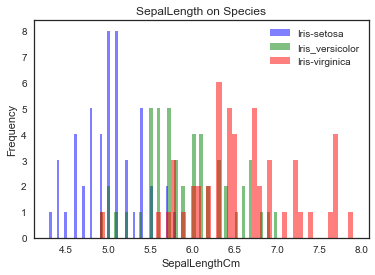

In [8]:
# Plot a histogram of SepalLength Frequency on Species (matplotlib)
Iris_setosa = data[data["Species"] == "Iris-setosa"]
Iris_versicolor = data[data["Species"] == "Iris-versicolor"]
Iris_virginica = data[data["Species"] == "Iris-virginica"]

Iris_setosa["SepalLengthCm"].plot.hist(alpha=0.5,color='blue',bins=50) # Setting the opacity(alpha value) & setting the bar width((bins value)
Iris_versicolor["SepalLengthCm"].plot.hist(alpha=0.5,color='green',bins=50)
Iris_virginica["SepalLengthCm"].plot.hist(alpha=0.5,color='red',bins=50)
plt.legend(['Iris-setosa','Iris_versicolor','Iris-virginica'])
plt.xlabel('SepalLengthCm')
plt.ylabel('Frequency')
plt.title('SepalLength on Species')
plt.show()

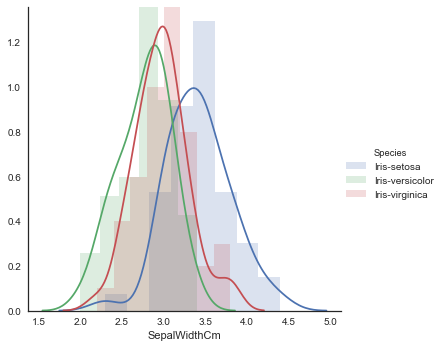

In [9]:
# Plot a histogram of SepalWidth Frequency on Species (sns)
sns.FacetGrid(data, hue="Species", size=5).map(sns.distplot,"SepalWidthCm", hist_kws={"alpha":.2}).add_legend()

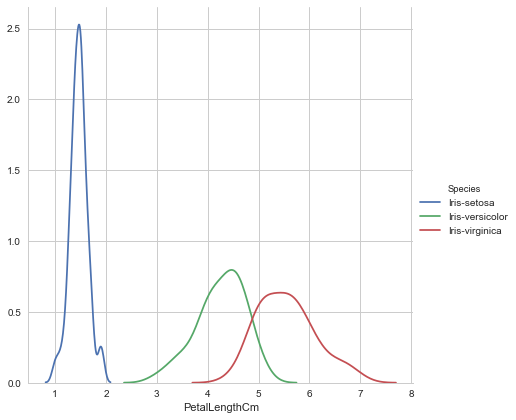

In [10]:
# Fit and plot the probability density function of PetalLength.
# kdeplot visualizes a kernel density estimate(estimated PDF)
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

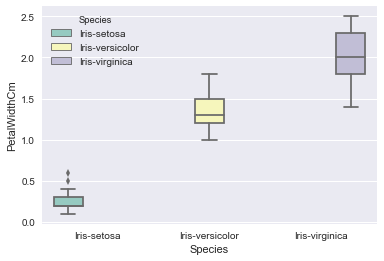

In [11]:
# Boxplot of SepalWidth
sns.set_style("darkgrid")
sns.boxplot(x="Species", y="PetalWidthCm", hue = "Species", data=data, palette="Set3")

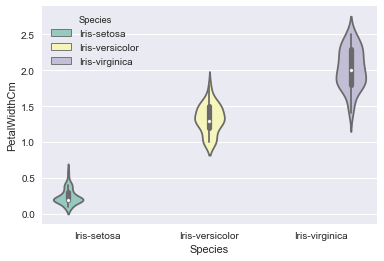

In [12]:
# A violin plot combines the benefits of boxplots and individual scatter points and aggregates them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.set_style("darkgrid")
sns.violinplot(x="Species", y="PetalWidthCm", hue = "Species", data=data, palette="Set3")

 <p> 2. **Multivariate** Distribution of the four features on species</p>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f4df4e0>,
      dtype=object)

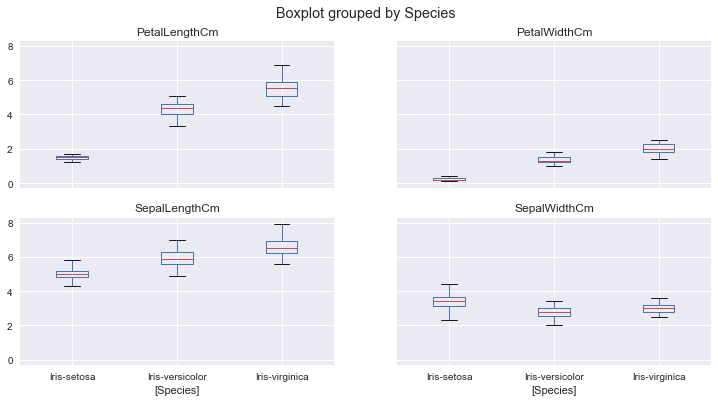

In [13]:
# A boxplot with Pandas on each feature split out by species
# .drop returns new object with labels in columns (axis=1) removed.

data.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

<p> One of the clusters contains Iris setosa, while the other cluster contains both Iris virginica and Iris versicolor and is not separable without the species information. Iris virginica has bigger petal length and a slightly bigger sepal length and width </p>

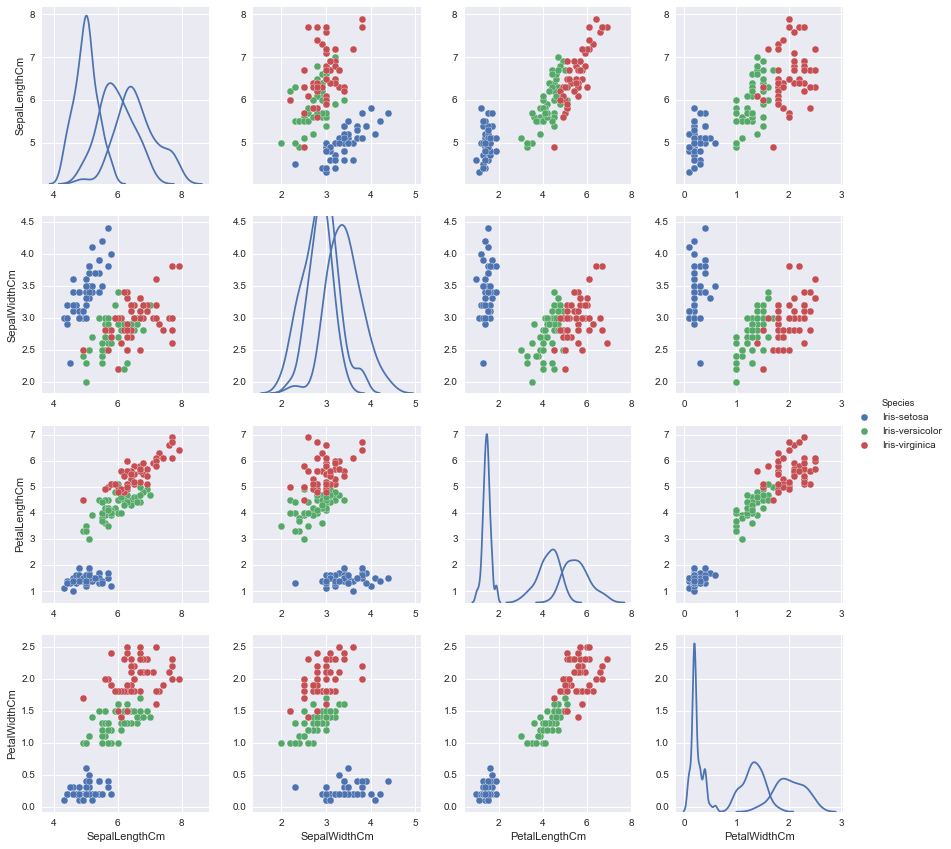

In [14]:
# Bivariate Pairwise relationships between columns
# The diagonal elements in a pairplot show the histogram by default (if diag_kind="kde" is deleted)
sns.pairplot(data.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

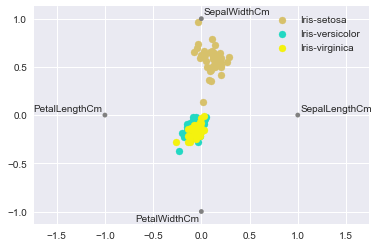

In [15]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane
from pandas.tools.plotting import radviz
radviz(data.drop("Id", axis=1), "Species")

## Part 2: Data Preprocessing
1. Encoding Categorical Variables (Categorical To Numerical)
2. Removing Correlations (Ordinal To Discrete)
3. Split the dataset
4. Mean Normalization (or Feature Scaling)

<p>1. Encoding categorical values with LabelEncoder</p>

In [16]:
# Replace Iris-setosa with 0, Iris-versicolor:1 and Iris-virginica:2 
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data["Species"] = labelencoder.fit_transform(data["Species"])
# data["Species"]
# Construct a dataframe from a dictionary
species = pd.DataFrame({'Species': ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']})
species

,Species
0,Iris-setosa
1,Iris-versicolor
2,Iris-virginica


<p>2. Transform Species to  a three dimensional vector</p>

In [17]:
# Before the transformation
# The first ten rows are setosa (Species= 0)
data.head(n=10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


In [18]:
# After the transformation

# Create dummy columns for each unique value in species to remove numerical correlations that labelencoder gave to data: 
# Iris-versicolor is not higher than Iris-setosa and Iris-setosa is not smaller than Iris-virginica
# Onehotencoder works with matrix of integers whereas getdummies works with dataframe

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
data = create_dummies(data,"Species")
data.head(n=10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_0,Species_1,Species_2
0,1,5.1,3.5,1.4,0.2,0,1,0,0
1,2,4.9,3.0,1.4,0.2,0,1,0,0
2,3,4.7,3.2,1.3,0.2,0,1,0,0
3,4,4.6,3.1,1.5,0.2,0,1,0,0
4,5,5.0,3.6,1.4,0.2,0,1,0,0
5,6,5.4,3.9,1.7,0.4,0,1,0,0
6,7,4.6,3.4,1.4,0.3,0,1,0,0
7,8,5.0,3.4,1.5,0.2,0,1,0,0
8,9,4.4,2.9,1.4,0.2,0,1,0,0
9,10,4.9,3.1,1.5,0.1,0,1,0,0


<p> Splitting the dataset into the Training set and Test set</p>

In [22]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

# Sample the train data set while holding out 20% for testing (evaluating) the classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)
# X_train

<p> 4. Mean Normalization </p>

In [23]:
# Features before mean normalization
unscaled_features = X_train

# Mean Normalization (Standarize the features to follow the normal distribution, to obtain a faster & better classifier)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train_array = sc.fit_transform(X_train.values) #calculate μ & σ(fit) and apply the transformation(transform)

# Assign the scaled data to a DataFrame & use the index and columns arguments to keep your original indices and column names:
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)

In [24]:
# Center test data. Use the μ & σ computed (fitted) on training data
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

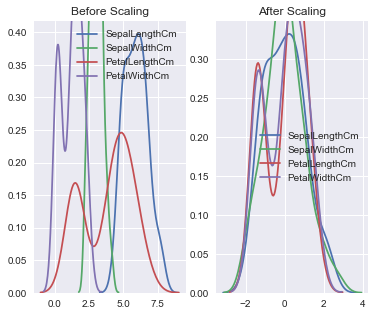

In [25]:
# Before & After Mean normalization
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(unscaled_features['SepalLengthCm'], ax=ax1)
sns.kdeplot(unscaled_features['SepalWidthCm'], ax=ax1)
sns.kdeplot(unscaled_features['PetalLengthCm'], ax=ax1)
sns.kdeplot(unscaled_features['PetalWidthCm'], ax=ax1)
ax2.set_title('After Scaling')
sns.kdeplot(X_train['SepalLengthCm'], ax=ax2)
sns.kdeplot(X_train['SepalWidthCm'], ax=ax2)
sns.kdeplot(X_train['PetalLengthCm'], ax=ax2)
sns.kdeplot(X_train['PetalWidthCm'], ax=ax2)
plt.show()

# Predicting Flower Species

Multi-class Classifier: Classify instances into one of three or more classes.
A classifier: correlates features of data with class properties
Gives the predicted classes: Softmax classifier
The cost function (how good are the parameters):Categorical Cross Entropy
Optimization algorithm finds optimal set of weights: Stochastic Gradient Descent

## Part 3: Build the model

![](pics-iris/Input-computauionunit-output.jpeg)

In [26]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10),solver='sgd',learning_rate_init=0.01,max_iter=500)

![](./pics-iris/multilayerperceptron_network copy.png)

## Part 4: Train the model
<p>Minimize the cost function. 
Gradient Descents => Find the values of Weights that minimize the cost function. 
We need to find the change rate of the cost function(dJ) so as to select the direction that goes downhill. This would save us time because it would prevent us from searching of weights values that increase the cost.</p>

In [27]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.01, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

![](.\pics-iris/gradientDescent.gif)

## Part 5: Test the model

In [28]:
"""
Predictions for X_test are compared with y_test

Score for mlp is the mean accuracy given the test data and labels
We can use accuracy (instead of F1 score) because our data labels are balanced (not skewed data)
Multilabel Classification: subset accuracy(harsh measure, see haming score or exact match ratio)
"""

# It's expected to see such a high result since the Iris dataset is so simple, clean and structured. 
# But it is not going to generalize into new data
mlp.score(X_test,y_test)

0.9666666666666667

### Part 5.1 Diagnose Sources of Error: Bias or Variance

In [29]:
# Score on train data in order to compare it with validation score and check for bias or variance error
mlp.score(X_train, y_train)

0.9833333333333333

![](pics-iris/cross validation.png)

<p><b> Validation Curve</b> error vs number of hidden nodes </p>

In [30]:
# Train-Test may not be randomly splitted. --Should I split the data into 60-40?--
# Hyperparameters may be tweaked in test data and cause overfitting
# One solution: Cross Validation 

# train_CV  = pd.concat([X_train, y_train], axis=1).reindex(X_train.index)
X_train_array = X_train.values
y_train_array = y_train.values

from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp, X_train_array,y_train_array,cv =3, scoring = 'accuracy')

#the samples are balanced across target classes hence the accuracy and the F1-score are almost equal.
f1_scores = cross_val_score(mlp, X_train_array,y_train_array,cv =3, scoring ='f1_macro')
print("Accuracy: \n ", scores, "\n", "Accuracy: \n ", f1_scores, "\n", "Mean Accuracy: %0.2f (+/- %0.2f) \n" % (scores.mean(), scores.std() * 2))

Accuracy: 
  [1.         0.925      0.97435897] 
 Accuracy: 
  [0.97616007 0.92624799 0.95054945] 
 Mean Accuracy: 0.97 (+/- 0.06) 



In [31]:
# Validation Curve
from sklearn.model_selection import validation_curve

X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

# Calculate accuracy on training and validation set using range of parameter values
train_scores, valid_scores = validation_curve(mlp, X, y, param_name='hidden_layer_sizes', param_range=np.arange(1,12), cv=3, scoring="accuracy")

# Columns represent the splits (cv=3) while rows represent the training size
print('train_scores:\n', train_scores, '\n valid_scores:\n', valid_scores)

train_scores:
 [[0.33333333 0.33333333 0.33333333]
 [0.96969697 0.33333333 0.96078431]
 [0.33333333 1.         0.96078431]
 [0.33333333 1.         0.97058824]
 [0.23232323 0.33333333 0.97058824]
 [0.96969697 1.         0.33333333]
 [0.96969697 1.         0.96078431]
 [0.95959596 0.33333333 0.1372549 ]
 [0.35353535 1.         0.97058824]
 [0.97979798 0.53535354 0.98039216]
 [0.96969697 1.         0.97058824]] 
 valid_scores:
 [[0.33333333 0.33333333 0.33333333]
 [1.         0.33333333 1.        ]
 [0.33333333 0.90196078 0.97916667]
 [0.33333333 0.92156863 0.95833333]
 [0.31372549 0.33333333 1.        ]
 [1.         0.94117647 0.33333333]
 [1.         0.94117647 0.95833333]
 [1.         0.33333333 0.20833333]
 [0.33333333 0.92156863 1.        ]
 [1.         0.52941176 0.97916667]
 [1.         0.94117647 1.        ]]


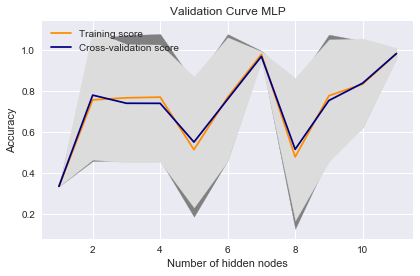

In [32]:
#Plot the Validation Curve: The result is 7 hidden_layer_sizes

# Create range of values for parameter "Number of hidden nodes"
param_range = np.arange(1,12)

# Calculate mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange")
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="gray")
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="gainsboro")

# Create plot
plt.title("Validation Curve MLP")
plt.xlabel("Number of hidden nodes")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

<p><b>Learning curve </b> (error vs number of training samples)</p>

In [39]:
# Learning curve (error vs number of training samples) 
from sklearn.model_selection import learning_curve
# train_sizes means you progressively add more data into your model. 
# For each of these train_sizes you have a different model trained upon
# We have 150 tr.examples where the 20% of them are the validation set, so the plot will reach 120 tr.examples

# Put 7 hidden nodes
mlp = MLPClassifier(hidden_layer_sizes=(7),solver='sgd',learning_rate_init=0.01,max_iter=80)
from sklearn.model_selection import ShuffleSplit
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
train_sizes, train_scores, validation_scores = learning_curve(
                                                   mlp, X,
                                                   y, cv = cv, n_jobs=5)                                               

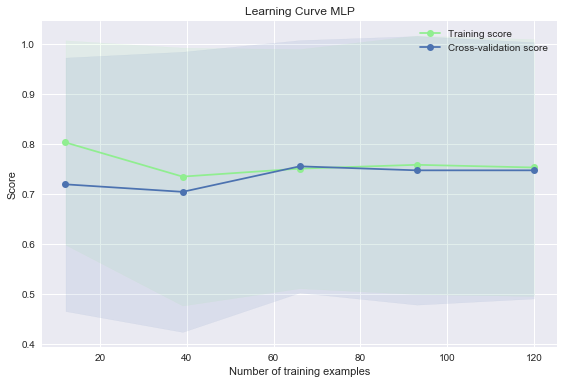

In [40]:
"""
To plot the learning curve, 
we need only a single error score per training set size, so we average row-wise for the y axis of the plot.
"""
plt.style.use('seaborn')

# Calculate mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="lightgreen")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="b")

# Plot mean accuracy scores for training and test sets score lines at each training set size

# Easy to fit a model with a small number of data points (1 to 40)
plt.plot(train_sizes, train_scores_mean, 'o-', color="lightgreen", label="Training score")
# Usually,its hard to predict for model with a small number of data points(1 to 40)
plt.plot(train_sizes, validation_scores_mean, 'o-', color="b", label="Cross-validation score")

# Create plot
plt.title("Learning Curve MLP")
plt.xlabel("Number of training examples")
plt.ylabel("Score")
plt.tight_layout()
plt.legend()
plt.show()

Our y-axis is 'score', not 'error', so the higher the score, the better the performance of the model.
Training score decreases, increases and plateau.
Cross-validation score increases and plateau (able to learn from data).
Our true score is 0.75. If we had lower scores (high errors):tweak model (perhaps increase model complexity with more hidden nodes or max_iteartions).
If we had a big gap between the two lines (high variance): add more data.
In our example, we know that mlp needs more data in order to work properly, otherwise there is no need to use such a complex model as Neural Nets. 

## Part 5.2 See other classifiers reults

### Decision Tree

In [41]:
# Check if a decision tree outputs more accurate results
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
# Test the model
tree.score(X_test,y_test) # metrics.accuracy_score is an alternative

0.9666666666666667

How would look like the decision tree splits on iris
![](.\pics-iris/dendogram-iris.jpg)

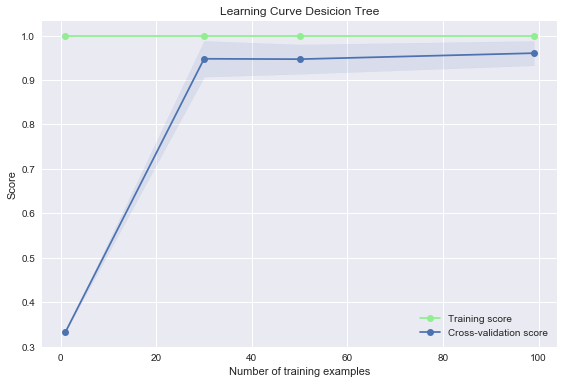

In [81]:
# Learning Curve DT
#4 tr.examples 
train_sizes = [1,30,50,99] #  put aside 50 examples as a validation set?
train_sizes, train_scores, validation_scores = learning_curve(
                                                   tree, X,
                                                   y, train_sizes = train_sizes, shuffle = True, cv = 3)
# Calculate mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="lightgreen")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="b")

plt.style.use('seaborn')

# Plot mean accuracy scores for training and test sets score lines at each training set size
# Easy to fit a model with a small number of data points (1 to 40)
plt.plot(train_sizes, train_scores_mean, 'o-', color="lightgreen", label="Training score")
# Usually,its hard to predict for model with a small number of data points(1 to 40)
plt.plot(train_sizes, validation_scores_mean, 'o-', color="b", label="Cross-validation score")

# Create plot
plt.title("Learning Curve Desicion Tree")
plt.xlabel("Number of training examples")
plt.ylabel("Score")
plt.tight_layout()
plt.legend()
plt.show()

Perfect training and CV score. Better to use Decision Tree instead of MLP even with less tr.examples

### Logistic Regression

In [70]:
# The ‘newton-cg’ optimization algorithm supports L2 regularization
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class = "multinomial", solver = "newton-cg")
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [71]:
# Test the model
lr.score(X_test, y_test)

0.9333333333333333

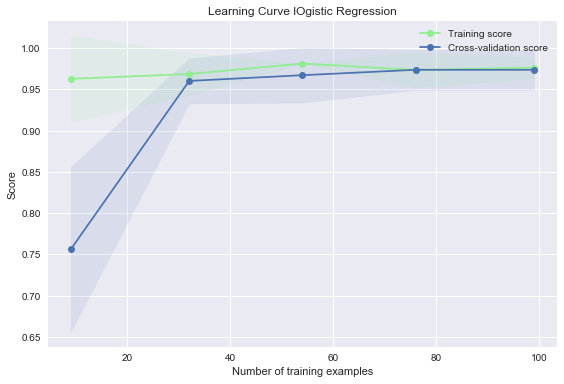

In [82]:
# K-fold CV: Split the TRAINING set into K folds. Train the model into k-1 folds. Test the model in the remained fold
# Good for large data sets
# How many folds? The more we have, the more prone to variance (although we reduce bias) & increased complexity (time & memory)

from sklearn.cross_validation import KFold
size = 150
cv = KFold(size, shuffle=True)
train_sizes, train_scores, validation_scores = learning_curve(
                                                   lr, X,
                                                   y, shuffle = True, cv = 3)
# Calculate mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="lightgreen")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="b")

# Plot mean accuracy scores for training and test sets score lines at each training set size

# Easy to fit a model with a small number of data points (1 to 40)
plt.plot(train_sizes, train_scores_mean, 'o-', color="lightgreen", label="Training score")
# Usually,its hard to predict for model with a small number of data points(1 to 40)
plt.plot(train_sizes, validation_scores_mean, 'o-', color="b", label="Cross-validation score")

plt.style.use('seaborn')

# Create plot
plt.title("Learning Curve Logistic Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Score")
plt.tight_layout()
plt.legend()
plt.show()

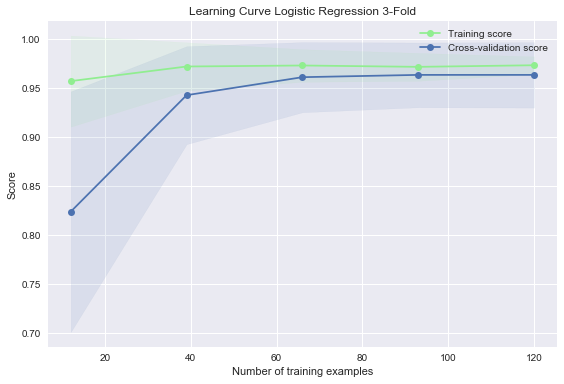

In [84]:
# Takes more time then the KFold
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
train_sizes, train_scores, validation_scores = learning_curve(
                                                   lr, X,
                                                   y, shuffle = True, cv = cv)
plt.style.use('seaborn')

# Calculate mean and standard deviation for training set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="lightgreen")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="b")

# Plot mean accuracy scores for training and test sets score lines at each training set size

# Easy to fit a model with a small number of data points (1 to 40)
plt.plot(train_sizes, train_scores_mean, 'o-', color="lightgreen", label="Training score")
# Usually,its hard to predict for model with a small number of data points(1 to 40)
plt.plot(train_sizes, validation_scores_mean, 'o-', color="b", label="Cross-validation score")

# Create plot
plt.title("Learning Curve Logistic Regression 3-Fold")
plt.xlabel("Number of training examples")
plt.ylabel("Score")
plt.tight_layout()
plt.legend()
plt.show()